In [79]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
import plotly.express as px 

In [14]:
df = pd.read_csv('../Naive Bayes/email_dataset/spam.csv', encoding='ISO-8859-1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
913,ham,Ok lor but not too early. Me still having proj...,NaN,NaN,NaN
307,ham,Lol yes. Our friendship is hanging on a thread...,NaN,NaN,NaN
5505,ham,What i told before i tell. Stupid hear after i...,NaN,NaN,NaN
3263,ham,I will send them to your email. Do you mind &...,NaN,NaN,NaN
648,ham,No prob. I will send to your email.,NaN,NaN,NaN


In [22]:
df = pd.read_csv('../Naive Bayes/email_dataset/spam.csv', encoding_errors='replace')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5310,ham,"yeah, that's what I was thinking",NaN,NaN,NaN
746,ham,"I promise to take good care of you, princess. ...",NaN,NaN,NaN
925,ham,"K, wait chikku..il send aftr &lt;#&gt; mins",NaN,NaN,NaN
5442,ham,"I thought i'd get him a watch, just cos thats ...",NaN,NaN,NaN
1111,ham,"Awesome, think we can get an 8th at usf some t...",NaN,NaN,NaN


In [23]:
df.shape

(5572, 5)

In [24]:
# Steps
# 1. Data Cleaning
# 2. EDA
# 3. Text preprocessing
# 4. Model building
# 5. Model evaluation
# 6. Improvements if any
# 7. Website creation
# 8. Deployment

# 1. Data Cleaning

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [27]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [29]:
df.sample(5)

,v1,v2
3996,spam,Bored housewives! Chat n date now! 0871750.77....
3324,ham,Nope... Juz off from work...
1620,ham,"Fuck babe, I miss you sooooo much !! I wish yo..."
1606,ham,Ok no prob... I'll come after lunch then...
4928,spam,Got what it takes 2 take part in the WRC Rally...


In [31]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [32]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [40]:
df['target'] = encoder.fit_transform(df['target'])

In [46]:
df.sample(5)
# 0: HAM( Good message)
# 1: SPAM ( Not good message)

,target,text
3825,0,"Goodmorning,my grandfather expired..so am on l..."
4630,0,"Got hella gas money, want to go on a grand nat..."
51,0,"A gram usually runs like &lt;#&gt; , a half e..."
2352,0,Thats cool. How was your day?
4882,0,"New Theory: Argument wins d SITUATION, but los..."


In [47]:
# checking for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [48]:
# Check for duplicates
df.duplicated().sum()

403

In [49]:
# remove the duplocates
df.drop_duplicates(keep='first', inplace= True)

In [54]:
df.duplicated().sum()

0

# 2. EDA 

In [83]:
df['target'].value_counts().reset_index()

,index,target
0,0,4516
1,1,653


In [84]:
px.bar(df['target'].value_counts())

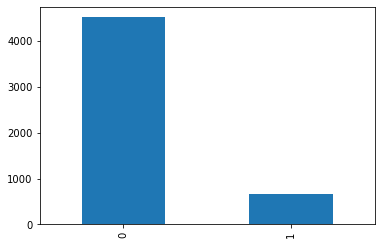

In [56]:
df['target'].value_counts().plot(kind = 'bar')
plt.show()

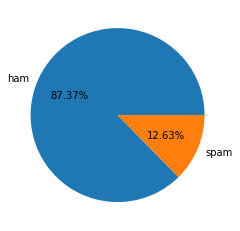

In [62]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%.2f%%')
plt.show()

In [86]:
px.pie(df['target'].value_counts().reset_index(),values = 'target', names = 'index' )

In [65]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Param\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [67]:
df['num_chars'] = df['text'].apply(len)

In [70]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [73]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [75]:
df.head(5)

,target,text,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [76]:
df[['num_chars', 'num_words', 'num_sentences']].describe().T

,count,mean,std,min,25%,50%,75%,max
num_chars,5169.0,78.923776,58.174846,2.0,36.0,60.0,117.0,910.0
num_words,5169.0,18.454246,13.325668,1.0,9.0,15.0,26.0,220.0
num_sentences,5169.0,1.948152,1.363792,1.0,1.0,1.0,2.0,28.0


In [77]:
# HAM messages 
df[df['target'] == 0][['num_chars', 'num_words', 'num_sentences']].describe().T

,count,mean,std,min,25%,50%,75%,max
num_chars,4516.0,70.456820,56.356802,2.0,34.0,52.0,90.0,910.0
num_words,4516.0,17.120903,13.493725,1.0,8.0,13.0,22.0,220.0
num_sentences,4516.0,1.799601,1.278465,1.0,1.0,1.0,2.0,28.0


In [78]:
# SPAM messages 
df[df['target'] == 1][['num_chars', 'num_words', 'num_sentences']].describe().T

,count,mean,std,min,25%,50%,75%,max
num_chars,653.0,137.479326,30.014336,13.0,131.0,148.0,157.0,223.0
num_words,653.0,27.675345,7.011513,2.0,25.0,29.0,32.0,46.0
num_sentences,653.0,2.975498,1.487993,1.0,2.0,3.0,4.0,8.0
